# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# DataPreprocessing

## Loading the Dataset
 California Housing Prize Prediction Dataset

In [ ]:
# loading the csv file
dataset=pd.read_csv('/content/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Label Encoding

In [ ]:
dataset['ocean_proximity'].value_counts()
# The column 'ocean_proximity' contains the object datatype.
# In Data preprocessing this column should be converted to numerical values
# In order to do that we will label encode the particular column

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['ocean_proximity']=le.fit_transform(dataset['ocean_proximity'])
dataset['ocean_proximity'].value_counts()

,count
ocean_proximity,
0,9136
1,6551
4,2658
3,2290
2,5


## Taking Care of Missing Values
The Column 'total_bedrooms' contains 7 missing values in order to overcome the missing values. It can be taken care by various methods
(like deleting the row, filling with mean or mode or median value of the particular column)

Here I have filled with the mean value of the particular column in place of the missing value.

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
dataset=imputer.fit_transform(dataset)

## Feature Scaling
The dataset values in each feature ranges between a large values in order to decrease the range of values we need to do Scaling.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataset=scaler.fit_transform(dataset)

## Spliting the Data into Train and Validation dataset

split ratio:0.8

In [ ]:
X=np.delete(dataset,-2,axis=1)
y=dataset[:,-2]

In [ ]:
X,y

(array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
          2.34476576,  1.2910888 ],
        [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
          2.33223796,  1.2910888 ],
        [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
          1.7826994 ,  1.2910888 ],
        ...,
        [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
         -1.14259331, -0.11673923],
        [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
         -1.05458292, -0.11673923],
        [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
         -0.78012947, -0.11673923]]),
 array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
        -1.05860847, -1.01787803]))

## Splitting the Dataset
training dataset: 80%

validation dataset: 20%


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


# Part 1:

Implementing a multiple variable regression model with gradient descent optimization by complete python code without using any Python module in the model implementation

## Regression Metrics
1.MAE (Mean Absolute Error)

2.MSE(Mean squared Error)

3.R-Squared Error

In [ ]:
def metrics(weights, bias, X, y):
    mse = 0
    mae = 0
    ss_res = 0   # residual sum of squares
    ss_tot = 0   # total sum of squares
    n = len(X)
    y_mean = sum(y) / n

    for i in range(n):
        y_pred = 0
        for j in range(len(weights)):
            y_pred += weights[j] * X[i][j]
        y_pred += bias

        error = y_pred-y[i]
        mse += error**2
        mae += abs(error)
        ss_res += error**2
        ss_tot += (y[i] - y_mean)**2

    cost=mse/(2*n)
    mse /= n
    mae /= n
    r2score = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

    return float(mae), float(mse), float(r2score), float(cost)

In [ ]:
def gradient_descent(weights, bias, X, y, learning_rate):
    weights_deriv = [0.0] *len(weights)
    bias_deriv = 0.0
    n = len(X)
    factor=1/n

    for i in range(n):
        y_pred = 0
        for j in range(len(weights)):
            y_pred += weights[j] * X[i][j]
        y_pred += bias
        error = y_pred - y[i]

        for j in range(len(weights)):
            weights_deriv[j] += factor * error * X[i][j]
        bias_deriv += factor * error

    for i in range(len(weights)):
        weights[i] -= learning_rate * weights_deriv[i]
    bias-= learning_rate * bias_deriv

    return weights, bias

In [ ]:
epochs=10000
weights=[0.0]*len(X_train[0])
bias=0
learning_rate=0.01
y_train_np=np.array(y_train) # converting into numpy array
y_val_np=np.array(y_val)
time_start=time.time()
curr_cost=0
prev_cost=-1
cost_0_list=[]
tolerance=1e-4
for i in range(1,epochs+1):

  if(i%100==0):
    mae,mse,r2_score,cost=metrics(weights,bias,X_train,y_train)
    mae_val,mse_val,r2_score_val,cost_val=metrics(weights,bias,X_val,y_val)
    cost_0_list.append(cost)

    print(f"""Epoch is {i}.
    Training:
    cost: {cost} mse: {mse}, mae: {mae}, r2score: {r2_score}.
    Validation:
    mse: {mse_val}, mae: {mae_val}, r2score: {r2_score_val}.""")

    if(abs(curr_cost-prev_cost)<tolerance):
      print(f"Converged at epoch {i}")
      end_time=time.time()
      convg_time_0=end_time-time_start

      print(f"Time taken for convergence is {convg_time_0}")
      break
    prev_cost=curr_cost
    curr_cost=cost

  weights,bias=gradient_descent(weights,bias,X_train,y_train,learning_rate)

Epoch is 100.
    Training:
    cost: 0.26510100648853857 mse: 0.5302020129770771, mae: 0.5603900665040722, r2score: 0.4718715167128973.
    Validation:
    mse: 0.527782924905081, mae: 0.5583029999818988, r2score: 0.4637021542855898.
Epoch is 200.
    Training:
    cost: 0.22549754023973553 mse: 0.45099508047947107, mae: 0.5047543387745412, r2score: 0.5507686843997976.
    Validation:
    mse: 0.45429279939722594, mae: 0.5058779379432014, r2score: 0.5383779236811845.
Epoch is 300.
    Training:
    cost: 0.21486234603477103 mse: 0.42972469206954206, mae: 0.4873020611721124, r2score: 0.5719558879465882.
    Validation:
    mse: 0.435480493317246, mae: 0.4894865778957202, r2score: 0.5574937357841013.
Epoch is 400.
    Training:
    cost: 0.20925732629144683 mse: 0.41851465258289366, mae: 0.47842347612925806, r2score: 0.5831220868797637.
    Validation:
    mse: 0.425598039969838, mae: 0.4811481442155498, r2score: 0.5675356264753191.
Epoch is 500.
    Training:
    cost: 0.20505046116965

In [ ]:
speed_conv_0= i/convg_time_0
speed_conv_0

5.9318644946733405

In [ ]:
classification_report={'mae':[],'mse':[],'r2score':[],'cost':[],'conv_speed':[]}

In [ ]:
mae_0,mse_0,r2_score_0,cost_0=metrics(weights,bias,X_val,y_val)
classification_report['mae'].append(mae_0)
classification_report['mse'].append(mse_0)
classification_report['r2score'].append(r2_score_0)
classification_report['cost'].append(cost_0)
classification_report['conv_speed'].append(speed_conv_0)

# Part 2:

Implementing a multiple linear regression model with gradient descent
optimization by using a numpy library for vectorized optimization process
and to enhance the performance through parellelization.

## Regression Metrics

1.MAE (Mean Absolute Error)

2.MSE(Mean squared Error)

3.R-Squared Error

In [ ]:
def loss_function(X,y_true,weights,bias):
  y_pred=np.dot(X,weights)+bias
  n=len(y_true)

  ss_res=np.sum((y_true-y_pred)**2)   # residual sum of squares
  ss_tot=np.sum((y_true-np.mean(y_true))**2)  # total sum of squares

  cost=np.sum((y_pred - y_true) ** 2) / (2 * n)

  mse=ss_res/n
  mae=np.mean(np.abs(y_true-y_pred))
  r2_score=1-(ss_res/ss_tot) if ss_tot!=0 else 0

  return float(mse), float(mae), float(r2_score), float(cost)


In [ ]:
def gradient_descent(X, y, weights, bias, learning_rate):
    n = len(X)
    y_pred = np.dot(X, weights) + bias
    error =y_pred-y
    weights_gradient = (1/n) * np.dot(X.T, error)
    bias_gradient = (1/n) * np.sum(error)
    weights = weights - learning_rate * weights_gradient
    bias = bias - learning_rate * bias_gradient

    return weights, bias

In [ ]:
n_features = X_train[0].shape
weights = np.zeros(n_features)
bias=0
learning_rate=0.01
epochs=10000
prev_cost=-1
curr_cost=0
tolerance=1e-4
cost_1_list=[]
time_start=time.time()

for epoch in range(1,epochs+1):

  if epoch % 100 == 0:
    mse, mae, r2_score, cost = loss_function(X_train,y_train,weights,bias)
    mse_val, mae_val, r2_score_val, cost_val = loss_function(X_val,y_val,weights,bias)
    cost_1_list.append(cost)
    print(f"""Epoch is {epoch}
          Training:
          cost: {cost}, mse: {mse}, mae: {mae}, r2_score: {r2_score}.

          Validation:
          mse: {mse_val}, mae: {mae_val}, r2_score: {r2_score_val} """)

    if(abs(curr_cost-prev_cost)<tolerance):
      print(f"Converged at epoch {epoch}")
      end_time=time.time()
      convg_time_1=end_time-time_start
      print(f"Time taken for convergence is {convg_time_1}")
      break
    prev_cost=curr_cost
    curr_cost=cost

  weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate)

Epoch is 100
          Training:
          cost: 0.26510100648853907, mse: 0.5302020129770781, mae: 0.5603900665040746, r2_score: 0.47187151671288874.

          Validation:
          mse: 0.5277829249050797, mae: 0.5583029999818989, r2_score: 0.463702154285592 
Epoch is 200
          Training:
          cost: 0.22549754023973528, mse: 0.45099508047947057, mae: 0.5047543387745427, r2_score: 0.5507686843997919.

          Validation:
          mse: 0.45429279939722633, mae: 0.505877937943201, r2_score: 0.538377923681185 
Epoch is 300
          Training:
          cost: 0.2148623460347701, mse: 0.4297246920695402, mae: 0.48730206117211267, r2_score: 0.571955887946584.

          Validation:
          mse: 0.4354804933172466, mae: 0.48948657789571953, r2_score: 0.5574937357841014 
Epoch is 400
          Training:
          cost: 0.209257326291447, mse: 0.418514652582894, mae: 0.4784234761292568, r2_score: 0.5831220868797575.

          Validation:
          mse: 0.42559803996983875, mae: 

In [ ]:
mse_1, mae_1, r2_score_1, cost_1 = loss_function(X_val,y_val,weights,bias)
speed_conv_1=epoch/convg_time_1

classification_report['mae'].append(mae_1)
classification_report['mse'].append(mse_1)
classification_report['r2score'].append(r2_score_1)
classification_report['conv_speed'].append(speed_conv_1)
classification_report['cost'].append(cost_1)

# Part 3:

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
start=time.time()
model.fit(X_train,y_train)
end=time.time()
fitting_time_sklearn=end-start
print(f"Time taken is {fitting_time_sklearn}")

Time taken is 0.0059435367584228516


In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred=model.predict(X_val)

mae_2=float(mean_absolute_error(y_val,y_pred))
mse_2=float(mean_squared_error(y_val,y_pred))
r2_score_2=float(r2_score(y_val,y_pred))

print(f"r2score:{r2_score_2},mae:{mae},mse:{mse}")

classification_report['mae'].append(mae_2)
classification_report['mse'].append(mse_2)
classification_report['r2score'].append(r2_score_2)

r2score:0.6142406531011786,mae:0.43907710396498073,mse:0.3628386509388964


# Evaluation and Comparison

## Cost Function vs Epochs


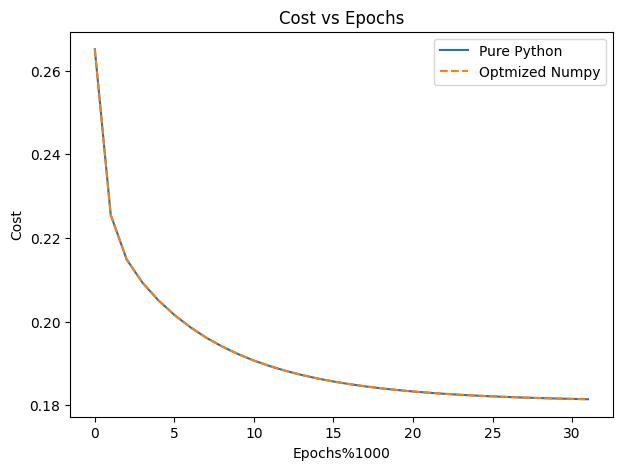

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(cost_0_list,label="Pure Python")
plt.plot(cost_1_list,label="Optmized Numpy",ls='--')
plt.xlabel("Epochs%1000")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.legend()
plt.show()

In [ ]:
classification_report

{'mae': [0.44745891180282565, 0.44745891180282654, 0.4493076576814987],
 'mse': [0.376647076195294, 0.3766470761952945, 0.3796345594946766],
 'r2score': [0.617276334594388, 0.6172763345943881, 0.6142406531011786],
 'cost': [0.188323538097647, 0.18832353809764724],
 'conv_speed': [5.9318644946733405, 3690.6177201044457]}

## Regression Metrics

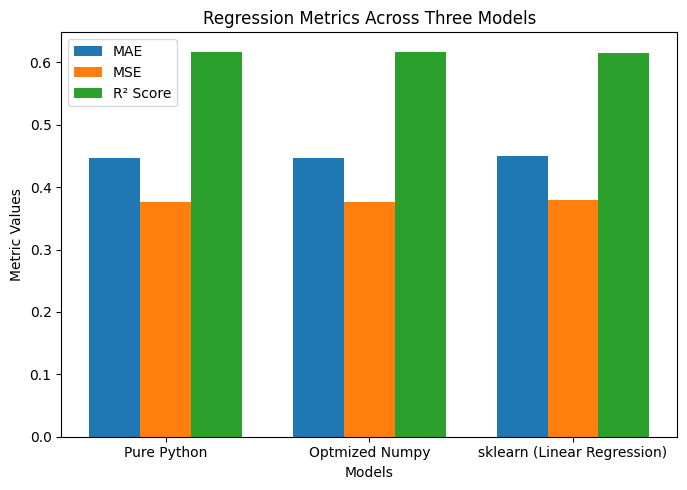

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models=['Pure Python', 'Optmized Numpy', 'sklearn (Linear Regression)']
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(7, 5))
plt.bar(x - width, classification_report['mae'], width, label='MAE')
plt.bar(x,classification_report['mse'], width, label='MSE')
plt.bar(x + width, classification_report['r2score'], width, label='R² Score')

plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Regression Metrics Across Three Models')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()


# Final Costs

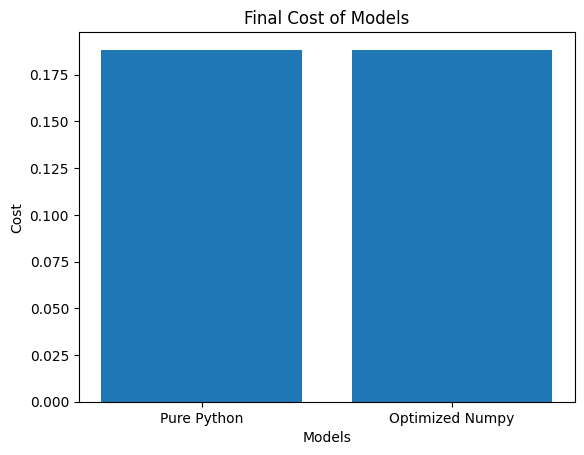

In [ ]:
plt.bar([0,1],classification_report['cost'],label='Final cost')
plt.xticks([0,1],labels=['Pure Python','Optimized Numpy'])
plt.xlabel('Models')
plt.ylabel('Cost')
plt.title('Final Cost of Models')
plt.show()

## Convergence Speed of Models

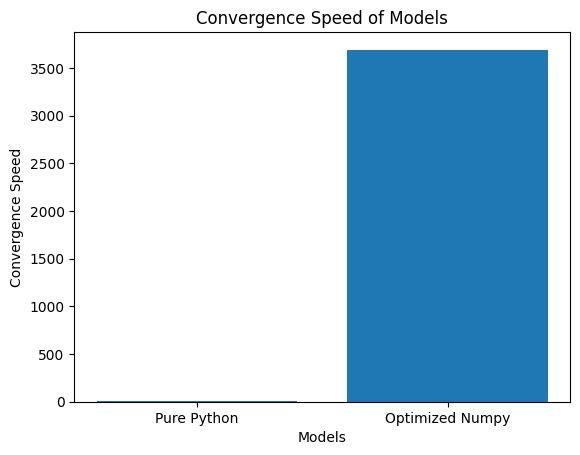

In [ ]:
plt.bar([0,1],classification_report['conv_speed'],label='Convergence Speed')
plt.xticks([0,1],labels=['Pure Python','Optimized Numpy'])
plt.xlabel('Models')
plt.ylabel('Convergence Speed')
plt.title('Convergence Speed of Models')
plt.show()